# Preamble

In [1]:
# Essentials
import os, sys, glob
import pandas as pd
import numpy as np
import nibabel as nib

# Stats
import scipy as sp
from scipy import stats
import statsmodels.api as sm
import pingouin as pg

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
sys.path.append('/Users/lindenmp/Dropbox/Work/ResProjects/NormativeNeuroDev_CrossSec_T1/code/func/')
from proj_environment import set_proj_env

In [3]:
train_test_str = 'squeakycleanExclude'
exclude_str = 't1Exclude' # 't1Exclude' 'fsFinalExclude'
parc_str = 'schaefer' # 'schaefer' 'lausanne'
parc_scale = 400 # 200 400 | 60 125
extra_str = ''
parcel_names, parcel_loc, drop_parcels, num_parcels, yeo_idx, yeo_labels = set_proj_env(train_test_str = train_test_str, exclude_str = exclude_str,
                                                                            parc_str = parc_str, parc_scale = parc_scale, extra_str = extra_str)

### Setup output directory

In [4]:
print(os.environ['MODELDIR_BASE'])
print(os.environ['MODELDIR'])
if not os.path.exists(os.environ['MODELDIR']): os.makedirs(os.environ['MODELDIR'])

/Users/lindenmp/Dropbox/Work/ResProjects/NormativeNeuroDev_CrossSec_T1/analysis/normative/t1Exclude/squeakycleanExclude/schaefer_400
/Users/lindenmp/Dropbox/Work/ResProjects/NormativeNeuroDev_CrossSec_T1/analysis/normative/t1Exclude/squeakycleanExclude/schaefer_400


## Load data

In [5]:
# Load data
df = pd.read_csv(os.path.join(os.environ['MODELDIR_BASE'], 'df_pheno.csv'))
df.set_index(['bblid', 'scanid'], inplace = True)
print(df.shape)

(1393, 49)


In [6]:
# Load data
df_node = pd.read_csv(os.path.join(os.environ['MODELDIR_BASE'], 'df_node_base.csv'))
df_node.set_index(['bblid', 'scanid'], inplace = True)
print(df_node.shape)

(1393, 801)


In [7]:
df_node.head()

,,squeakycleanExclude,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,...,vol_390,vol_391,vol_392,vol_393,vol_394,vol_395,vol_396,vol_397,vol_398,vol_399
bblid,scanid,,,,,,,,,,,,,,,,,,,,,
80961,2632,1,4.059796,5.224811,3.974109,4.175344,3.763810,3.859499,4.831972,4.220583,3.602131,...,1658.0,3047.0,714.0,2388.0,1153.0,1038.0,1249.0,1346.0,1296.0,774.0
80199,2637,0,3.984655,3.580555,3.680155,3.390238,3.768151,4.350763,3.254272,3.868829,3.328264,...,2078.0,2837.0,1024.0,2076.0,1125.0,1288.0,829.0,1506.0,699.0,854.0
80179,2643,1,3.456456,3.712380,3.886699,3.087788,2.230043,3.583135,2.900838,4.383651,3.490465,...,1273.0,2327.0,798.0,1149.0,1169.0,1629.0,835.0,690.0,1031.0,580.0
80812,2646,1,3.458441,3.805802,3.131799,3.102077,3.033641,3.971838,3.728316,3.902617,3.817542,...,1594.0,2676.0,589.0,2422.0,1542.0,1294.0,952.0,1274.0,662.0,761.0
80607,2647,1,3.374282,3.259752,4.093978,3.402414,2.782389,3.900980,3.710548,4.468545,2.674039,...,1632.0,2581.0,683.0,1757.0,1297.0,1054.0,792.0,1336.0,745.0,560.0


# Plots

In [8]:
# Labels
sns.set(style='white', context = 'talk', font_scale = .8)

In [9]:
metrics = ('ct', 'vol')
df_node_mean = pd.DataFrame(index = df_node.index, columns = metrics)
for metric in metrics:
    df_node_mean[metric] = df_node.filter(regex = metric, axis = 1).mean(axis = 1)

/Users/lindenmp/opt/anaconda3/envs/NormativeNeuroDev_CrossSec_T1/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


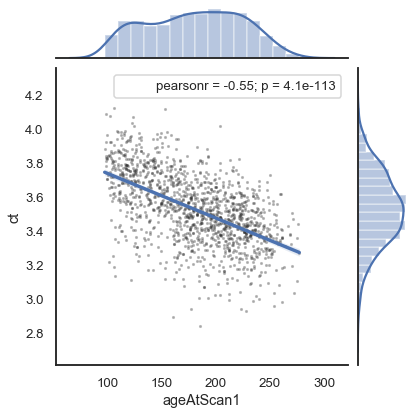

In [10]:
metric_x = 'ageAtScan1'
metric_y = 'ct'
f = sns.jointplot(x = df[metric_x], y = df_node_mean[metric_y], kind="reg")
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

/Users/lindenmp/opt/anaconda3/envs/NormativeNeuroDev_CrossSec_T1/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


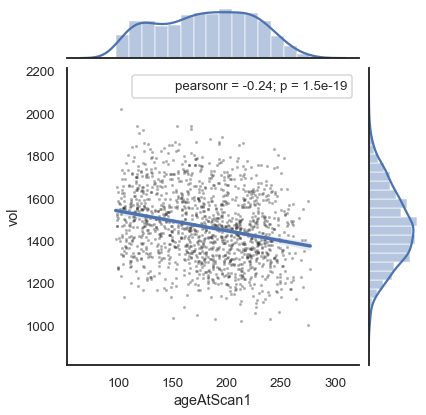

In [11]:
metric_x = 'ageAtScan1'
metric_y = 'vol'
f = sns.jointplot(x = df[metric_x], y = df_node_mean[metric_y], kind="reg")
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

In [12]:
my_str = os.environ['MODELDIR'].split('/')[-1]
my_str = my_str.split('_')[-1]
my_str

'400'

In [13]:
df_node.shape

(1393, 801)

## Nuisance regression

In [14]:
nuis = ['averageManualRating']
print(nuis)
df_nuis = df[nuis]
df_nuis = sm.add_constant(df_nuis)

my_str = '|'.join(metrics); print(my_str)
cols = df_node.filter(regex = my_str, axis = 1).columns

mdl = sm.OLS(df_node.loc[:,cols].astype(float), df_nuis.astype(float)).fit()
y_pred = mdl.predict(df_nuis)
y_pred.columns = cols
df_node.loc[:,cols] = df_node.loc[:,cols] - y_pred

['averageManualRating']
ct|vol


In [15]:
df_node.head()

,,squeakycleanExclude,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,...,vol_390,vol_391,vol_392,vol_393,vol_394,vol_395,vol_396,vol_397,vol_398,vol_399
bblid,scanid,,,,,,,,,,,,,,,,,,,,,
80961,2632,1,0.026842,1.436759,0.239741,0.811919,0.674081,-0.162730,1.389821,-0.191201,0.355908,...,-73.340971,210.356845,-109.976748,275.035748,-225.509842,-184.996198,332.319714,142.969637,418.058754,-30.141322
80199,2637,0,-0.048299,-0.207497,-0.054212,0.026814,0.678422,0.328535,-0.187879,-0.542956,0.082041,...,346.659029,0.356845,200.023252,-36.964252,-253.509842,65.003802,-87.680286,302.969637,-178.941246,49.858678
80179,2643,1,-0.590084,-0.090617,0.233064,-0.237376,-0.674929,-0.347982,-0.478737,-0.094333,0.301315,...,-443.923420,-481.284754,-27.567425,-957.431902,-226.155617,392.424870,-83.655430,-484.565316,146.586950,-204.410892
80812,2646,1,-0.574513,0.017750,-0.602569,-0.261348,-0.056087,-0.050391,0.286164,-0.509167,0.571319,...,-137.340971,-160.643155,-234.976748,309.035748,163.490158,71.003802,35.319714,70.969637,-215.941246,-43.141322
80607,2647,1,-0.658672,-0.528300,0.359610,0.038990,-0.307339,-0.121248,0.268397,0.056761,-0.572184,...,-99.340971,-255.643155,-140.976748,-355.964252,-81.509842,-168.996198,-124.680286,132.969637,-132.941246,-244.141322


In [16]:
df_node_mean = pd.DataFrame(index = df_node.index, columns = metrics)
for metric in metrics:
    df_node_mean[metric] = df_node.filter(regex = metric, axis = 1).mean(axis = 1)

/Users/lindenmp/opt/anaconda3/envs/NormativeNeuroDev_CrossSec_T1/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


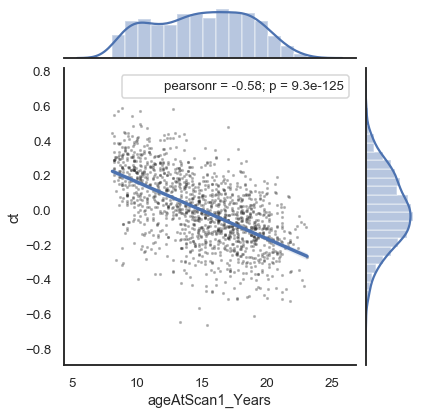

In [17]:
metric_x = 'ageAtScan1_Years'
metric_y = 'ct'
f = sns.jointplot(x = df[metric_x], y = df_node_mean[metric_y], kind="reg")
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

/Users/lindenmp/opt/anaconda3/envs/NormativeNeuroDev_CrossSec_T1/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


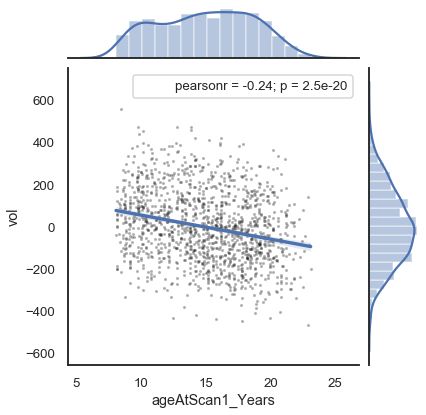

In [18]:
metric_x = 'ageAtScan1_Years'
metric_y = 'vol'
f = sns.jointplot(x = df[metric_x], y = df_node_mean[metric_y], kind="reg")
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

/Users/lindenmp/opt/anaconda3/envs/NormativeNeuroDev_CrossSec_T1/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


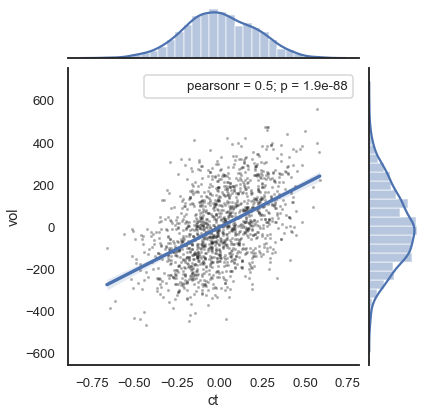

In [19]:
metric_x = 'ct'
metric_y = 'vol'
f = sns.jointplot(x = df_node_mean[metric_x], y = df_node_mean[metric_y], kind="reg")
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

In [20]:
R = np.zeros(num_parcels-1)
for i in range(0,num_parcels-1):
    R[i] = sp.stats.pearsonr(df_node.loc[:,'ct_'+str(i)],df_node.loc[:,'vol_'+str(i)])[0]

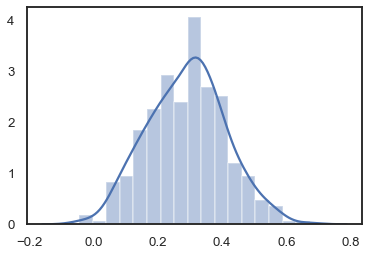

In [21]:
sns.distplot(R)

/Users/lindenmp/opt/anaconda3/envs/NormativeNeuroDev_CrossSec_T1/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


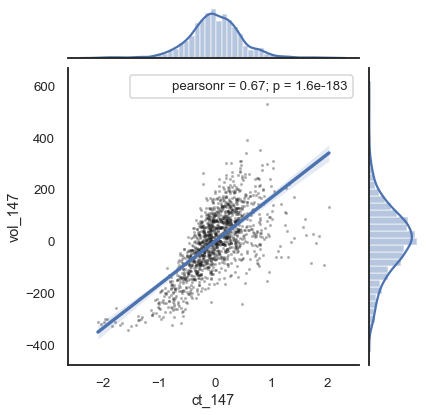

In [22]:
f = sns.jointplot(x = df_node['ct_'+str(np.argmax(R))], y = df_node['vol_'+str(np.argmax(R))], kind="reg")
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

/Users/lindenmp/opt/anaconda3/envs/NormativeNeuroDev_CrossSec_T1/lib/python3.7/site-packages/seaborn/axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


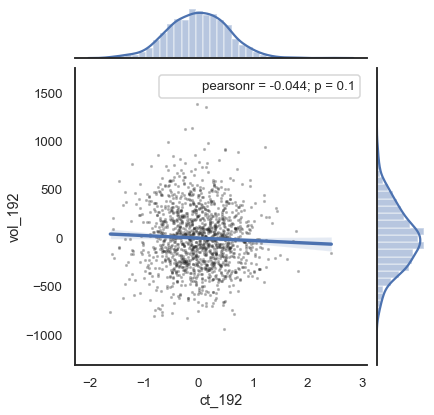

In [23]:
f = sns.jointplot(x = df_node['ct_'+str(np.argmin(R))], y = df_node['vol_'+str(np.argmin(R))], kind="reg")
f.annotate(sp.stats.pearsonr)
f.plot_joint(plt.scatter, c = "k", s = 5, linewidth = 2, marker = ".", alpha = 0.3)
f.ax_joint.collections[0].set_alpha(0)

In [24]:
df_node.isna().any().any()

False

## Save out

In [25]:
# Save out
df_node.to_csv(os.path.join(os.environ['MODELDIR'], 'df_node_clean.csv'))